<a href="https://colab.research.google.com/github/diveshp19/Java-Bank-App/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/drive/MyDrive/ML/10000.zip"

# Directory where you want to extract the files
extracted_dir_path = "/content/drive/MyDrive/ML"

# Create a directory if it doesn't exist
if not os.path.exists(extracted_dir_path):
    os.makedirs(extracted_dir_path)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Zip file extracted successfully!")


Zip file extracted successfully!


In [3]:
folder = "/content/drive/MyDrive/ML/Flikr 140k (1000, 200)"

In [4]:
! wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2024-03-23 03:08:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-23 03:08:02 (62.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import walk_through_dir, plot_loss_curves

In [6]:
walk_through_dir(folder)

There are 2 directories and 0 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)'.
There are 2 directories and 0 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Test'.
There are 0 directories and 200 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Test/Fake'.
There are 0 directories and 200 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Test/Real'.
There are 2 directories and 0 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Train'.
There are 0 directories and 1500 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Train/Fake'.
There are 0 directories and 1500 images in '/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Train/Real'.


In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential
import tensorflow as tf
train_dir = "/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Train"
test_dir = "/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [10]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=5)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=5)

Found 3000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [22]:
model_1 = Sequential([

        Conv2D(8, (3, 3), padding='same', activation='relu',  input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), padding='same'),

        Conv2D(8, (5, 5), padding='same', activation='relu'),
         BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), padding='same'),

        Conv2D(16, (5, 5), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), padding='same'),

        Conv2D(16, (5, 5), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(4, 4), padding='same'),

        Flatten(),
        Dropout(0.5),
        Dense(16),
        LeakyReLU(alpha=0.1),
        Dropout(0.5),
        Dense(1, activation=sigmoid),

])

In [27]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
600/600 [==============================] - 19s 28ms/step - loss: 0.5366 - accuracy: 0.7310 - val_loss: 0.5757 - val_accuracy: 0.7000
Epoch 2/5
600/600 [==============================] - 17s 29ms/step - loss: 0.5283 - accuracy: 0.7390 - val_loss: 0.5740 - val_accuracy: 0.7125
Epoch 3/5
600/600 [==============================] - 17s 28ms/step - loss: 0.5319 - accuracy: 0.7383 - val_loss: 0.5593 - val_accuracy: 0.7100
Epoch 4/5
600/600 [==============================] - 18s 29ms/step - loss: 0.5081 - accuracy: 0.7540 - val_loss: 0.5676 - val_accuracy: 0.7025
Epoch 5/5
600/600 [==============================] - 17s 29ms/step - loss: 0.5041 - accuracy: 0.7603 - val_loss: 0.5996 - val_accuracy: 0.7050


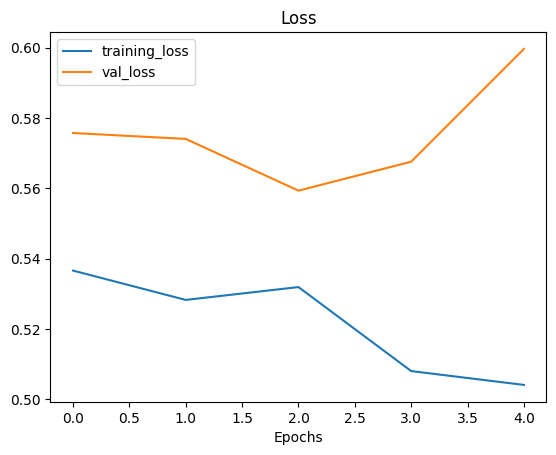

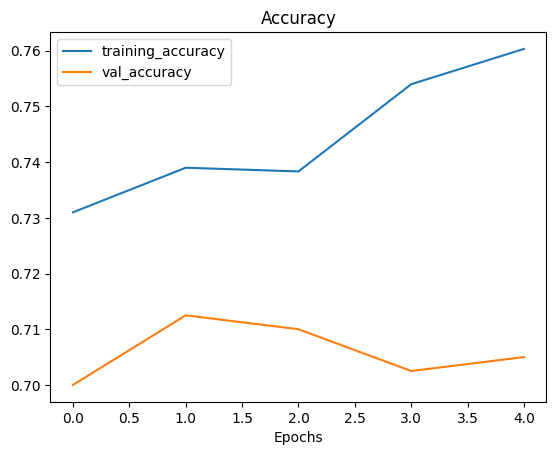

In [28]:
plot_loss_curves(history_1)

In [31]:
model_1.save('/content/drive/MyDrive/ML/pretrained_model.keras')

In [ ]:
/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Test/Fake/detected_00276TOPP4.jpg

In [2]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential
import tensorflow as tf
train_dir_2 = "/content/drive/MyDrive/ML/10000"
test_dir_2 = "/content/drive/MyDrive/ML/Flikr 140k (1000, 200)/Test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [3]:
train_data_2 = train_datagen.flow_from_directory(directory=train_dir_2,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=5)

test_data_2 = test_datagen.flow_from_directory(directory=test_dir_2,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=5)

Found 20000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_2,
                        epochs=5,
                        steps_per_epoch=len(train_data_2),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2))

Epoch 1/5
4000/4000 [==============================] - 108s 26ms/step - loss: 0.6272 - accuracy: 0.6446 - val_loss: 0.5541 - val_accuracy: 0.7300
Epoch 2/5
4000/4000 [==============================] - 102s 26ms/step - loss: 0.5338 - accuracy: 0.7322 - val_loss: 0.5342 - val_accuracy: 0.7550
Epoch 3/5
4000/4000 [==============================] - 101s 25ms/step - loss: 0.4520 - accuracy: 0.7894 - val_loss: 0.5242 - val_accuracy: 0.7350
Epoch 4/5
4000/4000 [==============================] - 102s 26ms/step - loss: 0.3690 - accuracy: 0.8339 - val_loss: 0.5101 - val_accuracy: 0.7700
Epoch 5/5
4000/4000 [==============================] - 101s 25ms/step - loss: 0.2985 - accuracy: 0.8710 - val_loss: 0.5659 - val_accuracy: 0.7250


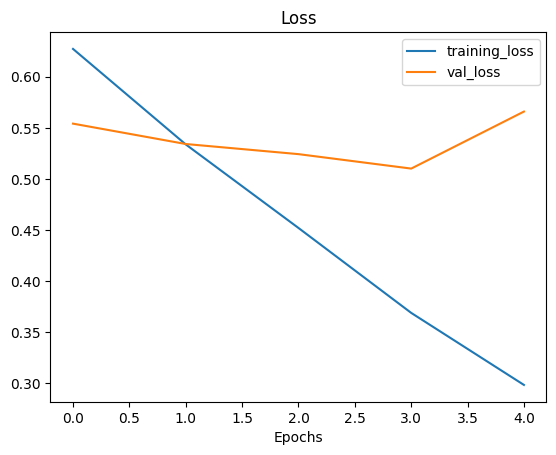

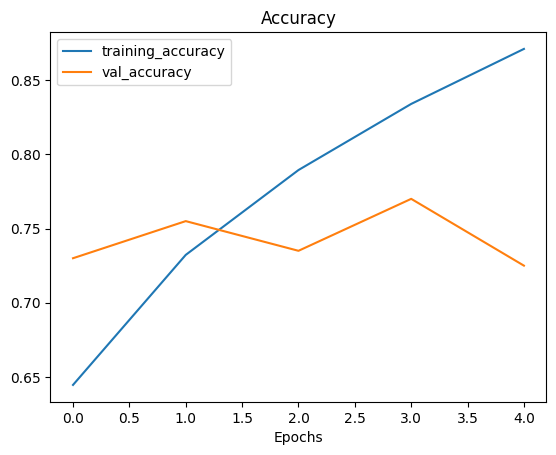

In [8]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_2)

In [10]:
model_2.save('10000_model_1.keras')

In [20]:

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from keras.models import load_model

# Load the saved model
model = load_model('10000_model_1.keras')

# Define the path to the image you want to predict
image_path = r'/content/drive/MyDrive/ML/10000/Fake_cropped/detected_0APCJNS8FF.jpg'
 # Replace 'path_to_your_image.jpg' with the actual path to your image

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size as per your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Optionally, you can convert predictions to human-readable format
# For example, if you have a binary classification model with sigmoid activation in the output layer:
# Convert probabilities to class labels (0 or 1)
# class_predictions = (predictions > 0.5).astype(int)

# Print or use the predictions as needed
print(predictions)


1/1 [==============================] - 0s 72ms/step
[[1.]]


In [22]:
from keras.models import load_model

# Assuming you have your Keras model saved as '10000_model_1.keras'
model = load_model('10000_model_1.keras')

# Save the model as an HDF5 file
model.save('10000_model_1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('10000_model_1.h5')

# Define the path to the image you want to predict
image_path = r'/content/drive/MyDrive/ML/10000/Real_cropped/detected_00002.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size as per your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Print or use the predictions as needed
print(predictions)


1/1 [==============================] - 0s 166ms/step
[[1.]]
